In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Spotify most streamed.csv')
df.head()

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,"3,783,983,806","1,736,378"
1,Ed Sheeran - Shape of You,"3,616,649,759","1,135,140"
2,Lewis Capaldi - Someone You Loved,"2,958,875,491","1,522,093"
3,Post Malone - Sunflower,"2,898,311,408","1,871,177"
4,Tones And I - Dance Monkey,"2,896,024,418","666,818"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist and Title  2500 non-null   object
 1   Streams           2500 non-null   object
 2   Daily             2497 non-null   object
dtypes: object(3)
memory usage: 58.7+ KB


In [4]:
df.shape

(2500, 3)

In [5]:
df.describe()

,Artist and Title,Streams,Daily
count,2500,2500,2497
unique,2479,2496,2488
top,Ben E. King - Stand by Me,"888,252,309","302,769"
freq,2,2,2


In [6]:
df.dtypes

,0
Artist and Title,object
Streams,object
Daily,object


In [7]:
df['Daily'] = df['Daily'].str.replace(',', '').fillna(0).astype(int)
print(df.dtypes)

Artist and Title    object
Streams             object
Daily                int64
dtype: object


In [8]:
df['Streams'] = df['Streams'].str.replace(',', '').fillna(0).astype(int)
print(df.dtypes)

Artist and Title    object
Streams              int64
Daily                int64
dtype: object


In [9]:
df.isnull().sum()

,0
Artist and Title,0
Streams,0
Daily,0


In [10]:
unique_counts = df.nunique()

# Get the unique values in each column
unique_values = {col: df[col].unique() for col in df.columns}

# Display the results
print("Number of unique values in each column:")
print(unique_counts)

print("\nUnique values in each column:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

Number of unique values in each column:
Artist and Title    2479
Streams             2496
Daily               2489
dtype: int64

Unique values in each column:
Artist and Title: ['The Weeknd - Blinding Lights' 'Ed Sheeran - Shape of You'
 'Lewis Capaldi - Someone You Loved' ... 'Clairo - Bubble Gum'
 'Bing Crosby - White Christmas' 'Shaggy - Angel']
Streams: [3783983806 3616649759 2958875491 ...  398936748  398725594  398310263]
Daily: [1736378 1135140 1522093 ...  370661 1250615  339498]


In [11]:
value_counts = df['Streams'].value_counts()
print(value_counts)

Streams
888252309    2
565006500    2
461973056    2
634230804    2
519200111    1
            ..
756227002    1
756058581    1
755895686    1
755720851    1
398310263    1
Name: count, Length: 2496, dtype: int64


In [12]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_data.corr()

In [13]:
correlations

,Streams,Daily
Streams,1.000000,0.464341
Daily,0.464341,1.000000


In [14]:
top5 = df.sort_values(by='Streams', ascending=False).head(5)
top5

,Artist and Title,Streams,Daily
0,The Weeknd - Blinding Lights,3783983806,1736378
1,Ed Sheeran - Shape of You,3616649759,1135140
2,Lewis Capaldi - Someone You Loved,2958875491,1522093
3,Post Malone - Sunflower,2898311408,1871177
4,Tones And I - Dance Monkey,2896024418,666818


# Data Visualization

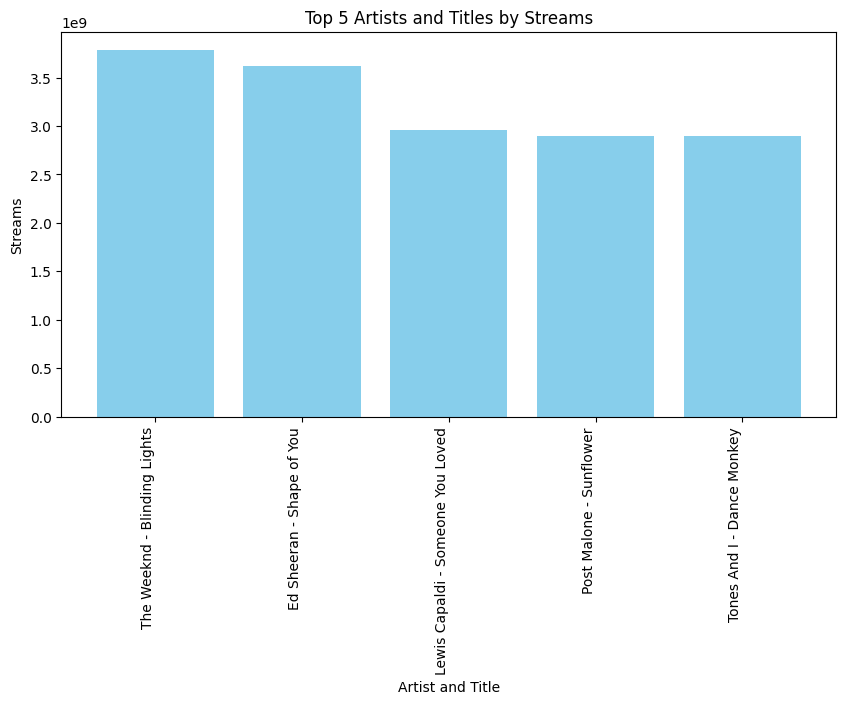

In [15]:
plt.figure(figsize=(10,5))
plt.bar(top5['Artist and Title'] , top5['Streams'], color = 'Skyblue')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
plt.xticks(rotation=90, ha = 'right')
plt.title('Top 5 Artists and Titles by Streams')
plt.show()

In [16]:
least5 = df.sort_values(by='Streams', ascending=True).head(5)
least5

,Artist and Title,Streams,Daily
2499,Shaggy - Angel,398310263,339498
2498,Bing Crosby - White Christmas,398725594,1250615
2497,Clairo - Bubble Gum,398936748,370661
2496,The Neighbourhood - You Get Me So High,399218096,617797
2495,Richard Marx - Right Here Waiting,399549516,250073


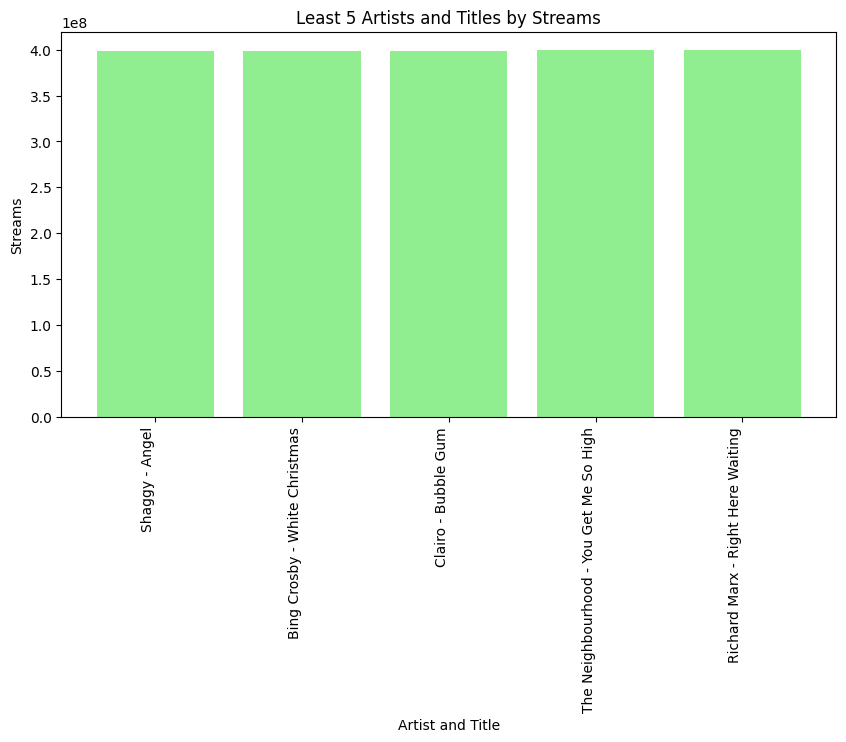

In [17]:
plt.figure(figsize=(10,5))
plt.bar(least5['Artist and Title'] , least5['Streams'], color = 'Lightgreen')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
plt.xticks(rotation=90, ha = 'right')
plt.title('Least 5 Artists and Titles by Streams')
plt.show()

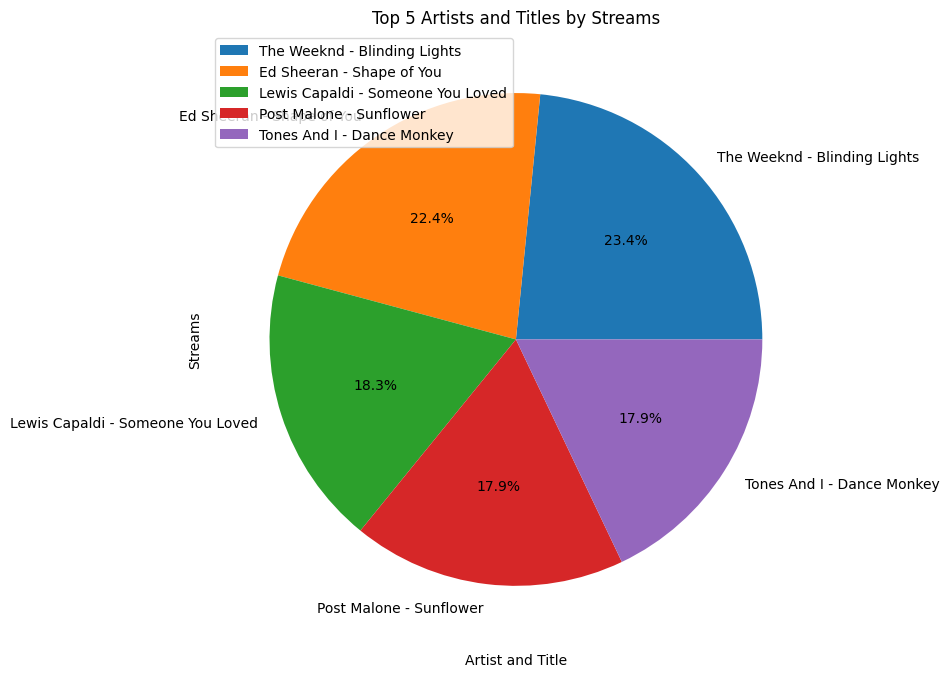

In [18]:
plt.figure(figsize=(8,8))
plt.pie(top5['Streams'],labels = top5['Artist and Title'] ,autopct = '%1.1f%%')
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
plt.xticks(rotation=90, ha = 'right')
plt.title('Top 5 Artists and Titles by Streams')
plt.legend(top5['Artist and Title'], loc='upper left')
plt.show()

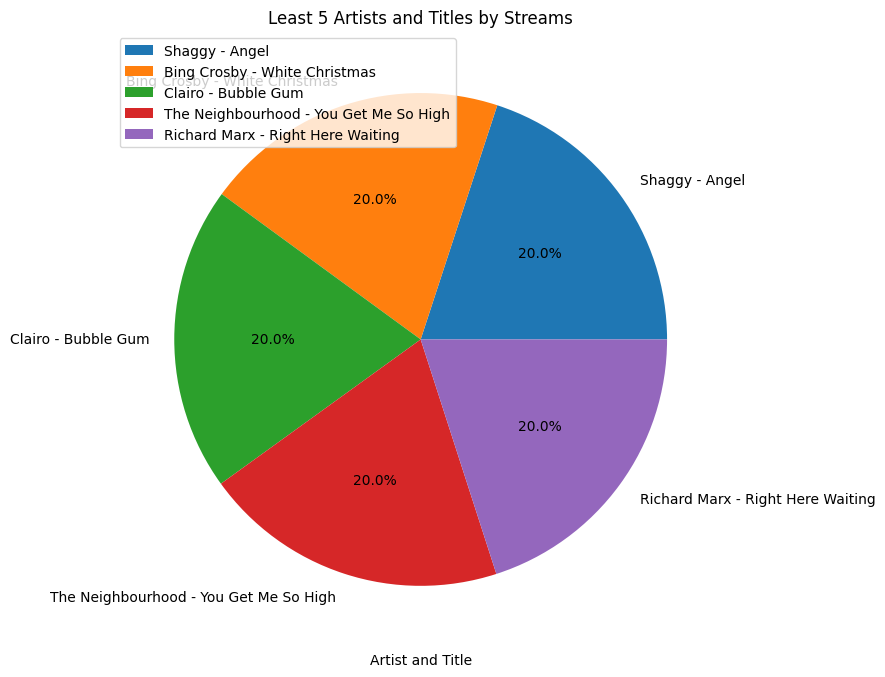

In [19]:
plt.figure(figsize=(8,8))
plt.pie(least5['Streams'],labels = least5['Artist and Title'] ,autopct = '%1.1f%%')
plt.xlabel('Artist and Title')

plt.xticks(rotation=90, ha = 'right')
plt.title('Least 5 Artists and Titles by Streams')
plt.legend(least5['Artist and Title'], loc='upper left')
plt.show()

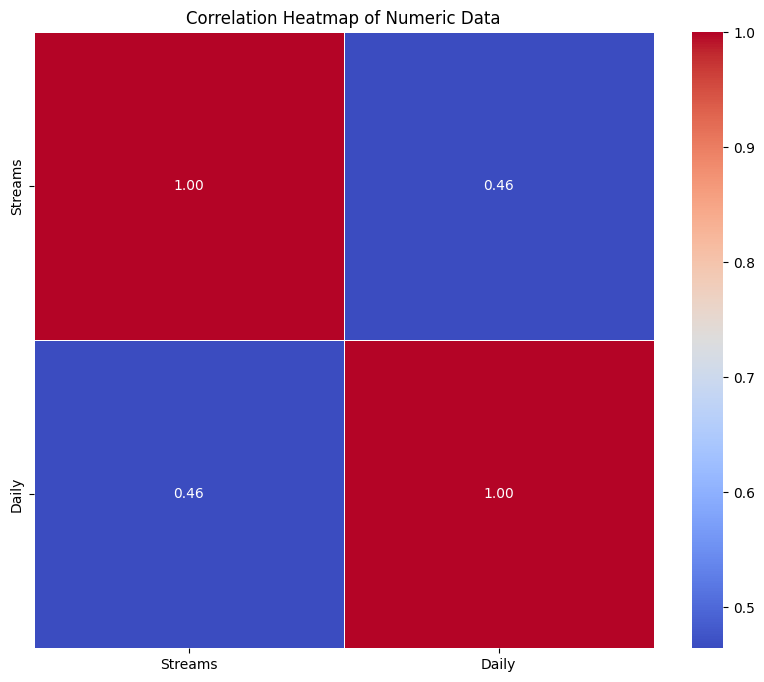

In [20]:
# Correlation Hetmap
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlations
correlations = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Data')
plt.show()
